In [1]:
from model import GroceryModel
import networkx as nx
import matplotlib.pyplot as plt
import json

In [11]:
config = {
    "height": 16,
    "width": 16,
    "n_persons": 10,
    "n_items": 1,
    "grid_layout": "grids/vertical_16x16.txt", 
    "avg_arrival": 4,
    "n_steps": 1000,
    "speed_dist": [[1, 2], [.5, .5]], # [[speed], [chances]]
    "familiar_dist": [[1, 0.6], [.75, .25]],
    "n_objectives": 4,
    "grid_stepsize": 0.5,
    "list_subgrids": [[(8, 15), (15, 15), (15, 8), (8, 8)],
                      [(0, 7), (7, 7), (7, 0), (0, 0)]
                      ]
}

# with open('config.json', 'w') as f:
#     json.dump(config, f)

In [3]:
model = GroceryModel(config)

In [4]:
# from .AgentBasedModelling-project.mesamodel.server import GroceryServer
from server import GroceryServer

In [5]:
model.run_model()

arriving!
chose speed: 1 and familiar: 1
Originally Person 25 has objs ['dairy', 'bread', 'vegetables', 'exit', 'exit']
After sorting person 25 has objs [('dairy', (6, 11)), ('bread', (6, 6)), ('vegetables', (0, 8)), ('exit', (2, 0)), ('exit', (2, 0))]
Person 25 has current obj dairy at (6, 11)
planned move: [(12, 15)]
Person 25 has current obj dairy at (6, 11)
planned move: [(11, 15)]
Person 25 has current obj dairy at (6, 11)
planned move: [(10, 15)]
arriving!
chose speed: 2 and familiar: 1
Originally Person 26 has objs ['entry', 'cheese', 'bread', 'bread', 'exit']
After sorting person 26 has objs [('entry', (12, 15)), ('bread', (6, 3)), ('bread', (6, 3)), ('cheese', (0, 6)), ('exit', (2, 0))]
Person 26 has current obj entry at (12, 15)
planned move: [(12, 15)]
Person 26 got entry!

getting next objective: ('bread', (6, 3))
Person 25 has current obj dairy at (6, 11)
planned move: [(9, 15)]
Person 25 has current obj dairy at (6, 11)
planned move: [(9, 14)]
Person 26 has current obj br

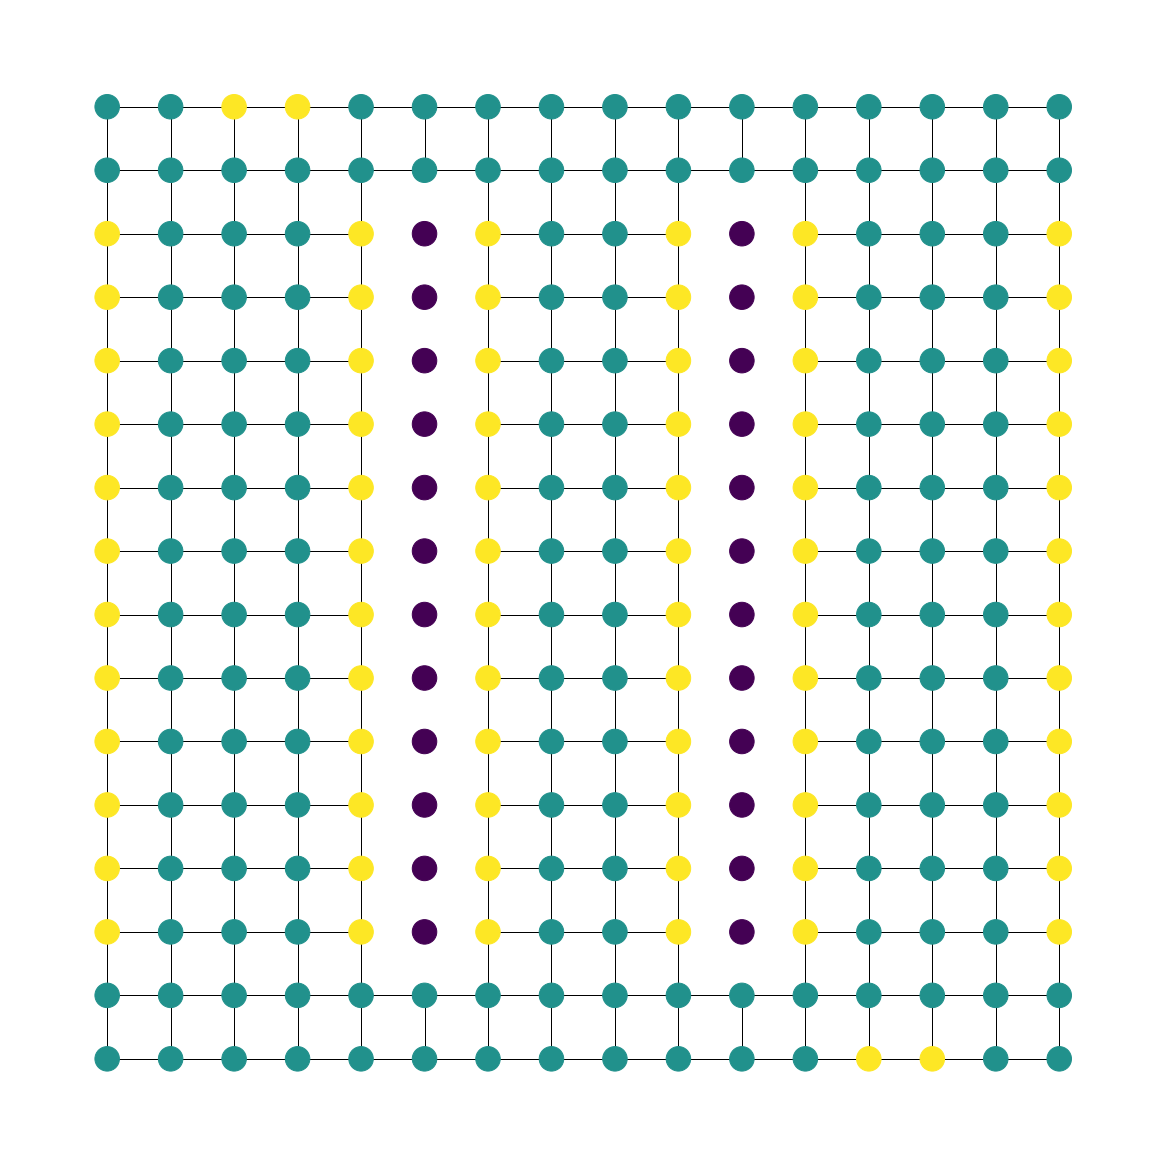

In [6]:
g = model.graph

plt.figure(figsize=(config["width"], config["height"]))
pos = {(x,y):(x,-y) for x,y in g.nodes()}

val_map = {}
for x, y in pos:
#     if x == 0 or x == config["width"]-1 or y == 0 or y == config["height"]-1:
#         val_map[(x,y)] = 0.0
        
    for coords in model.objectives.values():
        if (x,y) in coords:
            val_map[(x,y)] = 0.5
            
    if (x,y) in [obj.pos for obj in model.obstacles]:
        val_map[(x,y)] = 0.0
        
values = [val_map.get(node, 0.25) for node in g.nodes()]

nx.draw(g, pos=pos, 
        node_color=values, 
        node_size=600)

In [7]:
# print(g.edges)

In [8]:
data = model.datacollector.get_model_vars_dataframe()

In [9]:
print(data)

                                              persons  \
0                                         [Person 25]   
1                                         [Person 25]   
2                                         [Person 25]   
3                              [Person 25, Person 26]   
4                              [Person 25, Person 26]   
5                              [Person 25, Person 26]   
6                              [Person 25, Person 26]   
7                   [Person 25, Person 26, Person 27]   
8                   [Person 25, Person 26, Person 27]   
9                   [Person 25, Person 26, Person 27]   
10                  [Person 25, Person 26, Person 27]   
11                  [Person 25, Person 26, Person 27]   
12                  [Person 25, Person 26, Person 27]   
13                  [Person 25, Person 26, Person 27]   
14                  [Person 25, Person 26, Person 27]   
15                  [Person 25, Person 26, Person 27]   
16                  [Person 25,

In [10]:
for row in data["densities"]:
    print(row)

[0.01818181818181818, 0.0]
[0.01818181818181818, 0.0]
[0.01818181818181818, 0.0]
[0.03636363636363636, 0.0]
[0.03636363636363636, 0.0]
[0.03636363636363636, 0.0]
[0.03636363636363636, 0.0]
[0.05454545454545454, 0.0]
[0.03636363636363636, 0.0]
[0.03636363636363636, 0.0]
[0.01818181818181818, 0.0]
[0.01818181818181818, 0.0]
[0.01818181818181818, 0.01818181818181818]
[0.01818181818181818, 0.01818181818181818]
[0.01818181818181818, 0.01818181818181818]
[0.01818181818181818, 0.03636363636363636]
[0.01818181818181818, 0.03636363636363636]
[0.03636363636363636, 0.03636363636363636]
[0.01818181818181818, 0.03636363636363636]
[0.03636363636363636, 0.03636363636363636]
[0.03636363636363636, 0.03636363636363636]
[0.03636363636363636, 0.05454545454545454]
[0.03636363636363636, 0.05454545454545454]
[0.05454545454545454, 0.03636363636363636]
[0.05454545454545454, 0.03636363636363636]
[0.05454545454545454, 0.03636363636363636]
[0.05454545454545454, 0.03636363636363636]
[0.05454545454545454, 0.0181818